<a href="https://colab.research.google.com/github/koad7/NLP_PYTORCH/blob/main/building_features_text_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
import numpy

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sens_tokens = nltk.sent_tokenize('Does this tokenizer work? These are two different sentences')

In [ ]:
sens_tokens


['Does this tokenizer work?', 'These are two different sentences']

In [ ]:
word_tokens = nltk.word_tokenize('Does this tokenizer work? These are two different sentences')

In [ ]:
word_tokens

['Does',
 'this',
 'tokenizer',
 'work',
 '?',
 'These',
 'are',
 'two',
 'different',
 'sentences']

In [25]:
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.tokenize import WhitespaceTokenizer

In [26]:
pst = PunktSentenceTokenizer()
wt = WhitespaceTokenizer()

In [ ]:
text ='A simple lookup table that stores embeddings of a fixed dictionary and size. This module is often used to store word embeddings and retrieve them using indices. The input to the module is a list of indices, and the output is the corresponding word embeddings.'

In [ ]:
sent_tokens = pst.tokenize(text)

In [ ]:
sent_tokens

['A simple lookup table that stores embeddings of a fixed dictionary and size.',
 'This module is often used to store word embeddings and retrieve them using indices.',
 'The input to the module is a list of indices, and the output is the corresponding word embeddings.']

In [ ]:
span_tokens = pst.span_tokenize(text)

In [18]:
with open('/content/drive/MyDrive/TRAINING/Pytorch/building features from text/datasets/biography.txt', 'r') as f:
  file_contents = f.read()

print(file_contents)

﻿Marie Curie was a Polish-born physicist and chemist and one of the most famous scientists of her time.
Together with her husband Pierre, she was awarded the Nobel Prize in 1903, and she went on to win another in 1911.
Marie Sklodowska was born in Warsaw on 7 November 1867, the daughter of a teacher.
In 1891, she went to Paris to study physics and mathematics at the Sorbonne where she met Pierre Curie, professor of the School of Physics.
They were married in 1895.
The Curies worked together investigating radioactivity, building on the work of the German physicist Roentgen and the French physicist Becquerel.
In July 1898, the Curies announced the discovery of a new chemical element, polonium.
At the end of the year, they announced the discovery of another, radium.
The Curies, along with Becquerel, were awarded the Nobel Prize for Physics in 1903.
Pierre's life was cut short in 1906 when he was knocked down and killed by a carriage.
Marie took over his teaching post, becoming the first w

In [27]:
word_tokens = wt.tokenize(file_contents)

In [30]:
from nltk.probability import FreqDist

In [31]:
freq_dist = FreqDist(word_tokens)

In [33]:
freq_dist.most_common(20)

[('the', 22),
 ('of', 12),
 ('and', 11),
 ('in', 11),
 ('to', 10),
 ('was', 8),
 ('her', 7),
 ('she', 7),
 ('a', 6),
 ('The', 5),
 ('Nobel', 4),
 ('on', 4),
 ('for', 4),
 ('from', 4),
 ('physicist', 3),
 ('with', 3),
 ('Prize', 3),
 ('Marie', 3),
 ('herself', 3),
 ('Curie', 2)]

In [34]:
freq_dist.freq('freq')

0.0

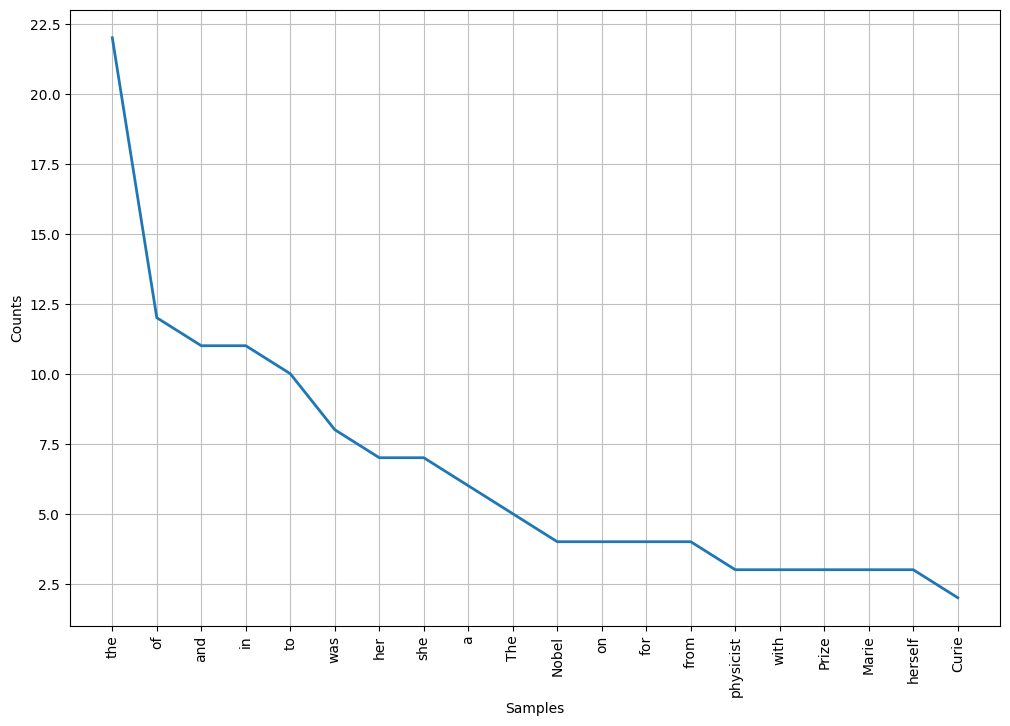

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
freq_dist.plot(20, cumulative=False)
plt.show()

In [38]:
file_contents = file_contents.lower()
word_tokens = wt.tokenize(file_contents)

In [39]:
print(word_tokens)

['\ufeffmarie', 'curie', 'was', 'a', 'polish-born', 'physicist', 'and', 'chemist', 'and', 'one', 'of', 'the', 'most', 'famous', 'scientists', 'of', 'her', 'time.', 'together', 'with', 'her', 'husband', 'pierre,', 'she', 'was', 'awarded', 'the', 'nobel', 'prize', 'in', '1903,', 'and', 'she', 'went', 'on', 'to', 'win', 'another', 'in', '1911.', 'marie', 'sklodowska', 'was', 'born', 'in', 'warsaw', 'on', '7', 'november', '1867,', 'the', 'daughter', 'of', 'a', 'teacher.', 'in', '1891,', 'she', 'went', 'to', 'paris', 'to', 'study', 'physics', 'and', 'mathematics', 'at', 'the', 'sorbonne', 'where', 'she', 'met', 'pierre', 'curie,', 'professor', 'of', 'the', 'school', 'of', 'physics.', 'they', 'were', 'married', 'in', '1895.', 'the', 'curies', 'worked', 'together', 'investigating', 'radioactivity,', 'building', 'on', 'the', 'work', 'of', 'the', 'german', 'physicist', 'roentgen', 'and', 'the', 'french', 'physicist', 'becquerel.', 'in', 'july', '1898,', 'the', 'curies', 'announced', 'the', 'dis

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
from nltk.corpus import stopwords
stop_wprds = set(stopwords.words('english'))
stop_wprds.update([',','.','The'])

In [43]:
print(stop_wprds)

{',', 'each', 'few', 've', 'had', 'ain', 'from', "that'll", 'who', 'while', 'before', 'through', 'my', "hasn't", "hadn't", 'shouldn', 'm', 'under', "wasn't", 'mustn', "you've", "didn't", 'a', 'did', 't', 'themselves', 'yourselves', 'are', 's', 'nor', 'them', 'yourself', 'once', 'only', 'now', 'in', 'which', 'into', "don't", "shouldn't", 'off', 'own', 'myself', 'didn', 'she', 'until', "shan't", 'about', 'do', 'with', 'won', 'so', 'no', 'is', 'as', 'needn', 'his', 'd', "won't", 'between', 'o', 'what', 'that', 'for', 'below', 'too', 'am', 'hasn', 'hadn', "you'll", 'and', 'where', 'i', 'very', 'ourselves', 'at', 'how', 'him', 'if', 'an', 'just', "mightn't", 'whom', 'not', 'herself', 'all', 'most', 'after', 'you', "it's", 'this', 'of', 'such', 'both', "couldn't", 'on', 'the', "should've", "wouldn't", 'we', "you'd", 'further', 'its', 'out', "she's", 'or', 'because', 'should', 'doing', "aren't", 'himself', 'having', 'down', 'can', 'doesn', 'our', 'yours', 'during', 'their', 'be', 'it', 'would

In [44]:
filtered_words = []
for w in word_tokens:
  if w not in stop_wprds:
    filtered_words.append(w)

print(filtered_words)

['\ufeffmarie', 'curie', 'polish-born', 'physicist', 'chemist', 'one', 'famous', 'scientists', 'time.', 'together', 'husband', 'pierre,', 'awarded', 'nobel', 'prize', '1903,', 'went', 'win', 'another', '1911.', 'marie', 'sklodowska', 'born', 'warsaw', '7', 'november', '1867,', 'daughter', 'teacher.', '1891,', 'went', 'paris', 'study', 'physics', 'mathematics', 'sorbonne', 'met', 'pierre', 'curie,', 'professor', 'school', 'physics.', 'married', '1895.', 'curies', 'worked', 'together', 'investigating', 'radioactivity,', 'building', 'work', 'german', 'physicist', 'roentgen', 'french', 'physicist', 'becquerel.', 'july', '1898,', 'curies', 'announced', 'discovery', 'new', 'chemical', 'element,', 'polonium.', 'end', 'year,', 'announced', 'discovery', 'another,', 'radium.', 'curies,', 'along', 'becquerel,', 'awarded', 'nobel', 'prize', 'physics', '1903.', "pierre's", 'life', 'cut', 'short', '1906', 'knocked', 'killed', 'carriage.', 'marie', 'took', 'teaching', 'post,', 'becoming', 'first', 'w

In [45]:
freq_dist = FreqDist(filtered_words)
freq_dist.most_common(20)

[('nobel', 4),
 ('physicist', 3),
 ('prize', 3),
 ('marie', 3),
 ('curie', 2),
 ('one', 2),
 ('scientists', 2),
 ('together', 2),
 ('awarded', 2),
 ('went', 2),
 ('1911.', 2),
 ('daughter', 2),
 ('physics', 2),
 ('curies', 2),
 ('work', 2),
 ('july', 2),
 ('announced', 2),
 ('discovery', 2),
 ('new', 2),
 ('received', 2)]

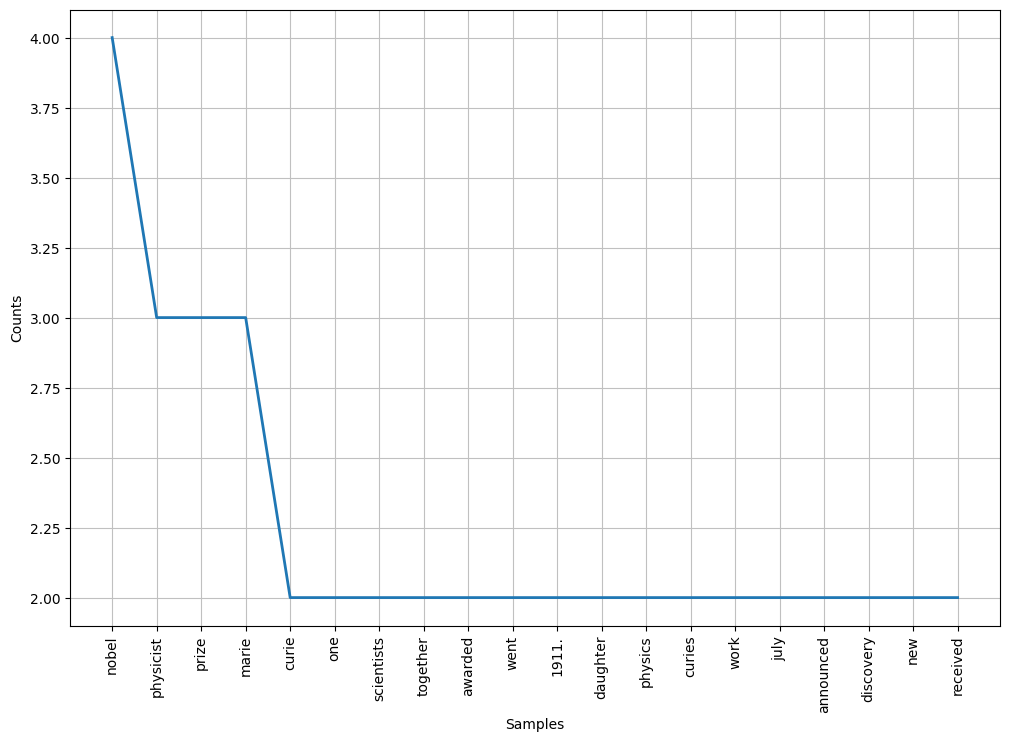

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
freq_dist.plot(20, cumulative=False)
plt.show()